In [14]:
import pandas as pd

Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet')

Y_df

,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0
...,...,...,...
373367,H99,744,24039.0
373368,H99,745,22946.0
373369,H99,746,22217.0
373370,H99,747,21416.0


In [47]:
Y_df = pd.read_csv('../notebook/datasets/combined.csv')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df = Y_df[Y_df['unique_id'] == 'H89']

In [48]:
# # uids = Y_df['unique_id'].unique()[:6] # Select 10 ids to make the example faster
# uids = ['H89']

# Y_df = Y_df.query('unique_id in @uids') 

# Y_df = Y_df.groupby('unique_id').tail(7 * 24) #Select last 7 days of data to make example faster
Y_df.fillna(0, inplace=True)
# Y_df.to_csv('combined_reduced.csv', index=False)
Y_df

,y,ds,unique_id
252,5.0,2019-01-01,H89
253,558.0,2019-01-02,H89
254,455.0,2019-01-03,H89
255,418.0,2019-01-04,H89
256,198.0,2019-01-05,H89
...,...,...,...
611,338.0,2019-12-27,H89
612,103.0,2019-12-28,H89
613,0.0,2019-12-29,H89
614,391.0,2019-12-30,H89


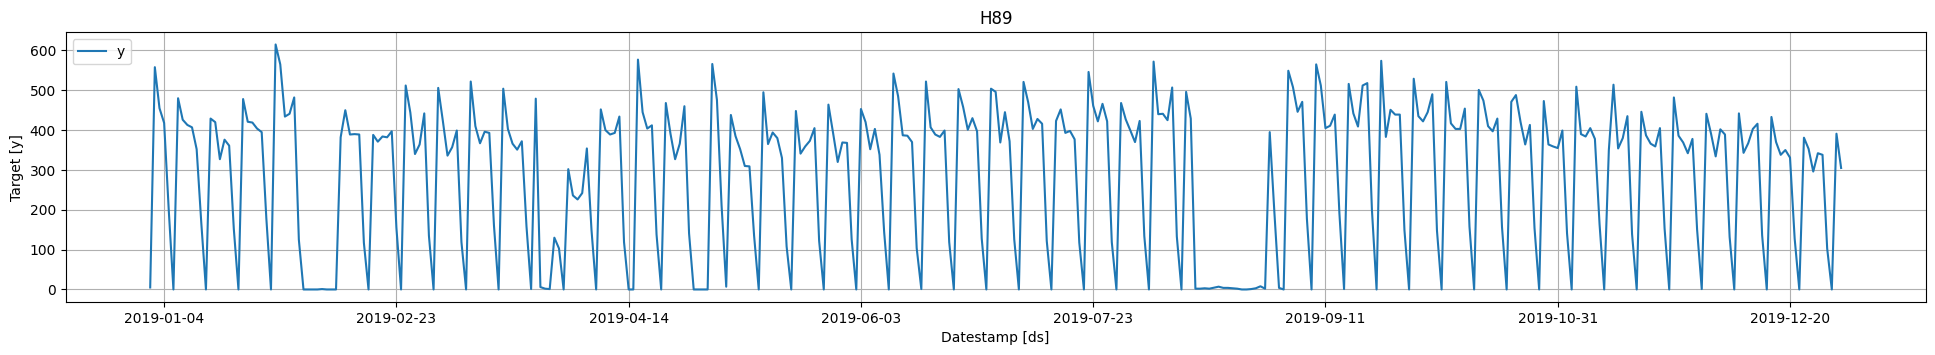

In [49]:
from statsforecast import StatsForecast

StatsForecast.plot(Y_df)

In [50]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models = [AutoARIMA(season_length = 7)],
    freq = 'D'
)

sf.fit(Y_df)

StatsForecast(models=[AutoARIMA])

In [51]:
forecast_df = sf.predict(h=60, level=[90]) 

forecast_df

,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
unique_id,,,,
H89,2020-01-01,300.713959,124.166611,477.261322
H89,2020-01-02,343.239563,149.377670,537.101501
H89,2020-01-03,351.394562,151.505035,551.284119
H89,2020-01-04,117.628609,-84.173721,319.430939
H89,2020-01-05,-3.384683,-205.819733,199.050369
H89,2020-01-06,406.601257,203.957275,609.245239
H89,2020-01-07,343.156433,140.443268,545.869629
H89,2020-01-08,319.117126,104.921310,533.312927
H89,2020-01-09,354.265350,137.728149,570.802551


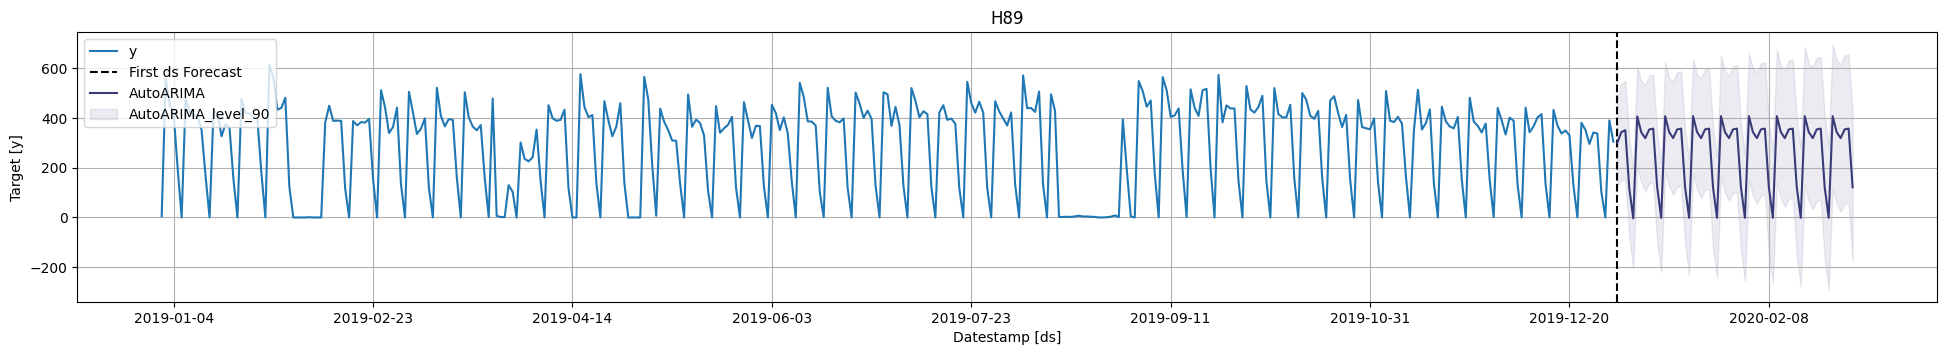

In [53]:
Y_df["ds"]=pd.to_datetime(Y_df["ds"])
sf.plot(Y_df, forecast_df, level=[90])

# Train/Test Split

In [54]:
y_train = Y_df[Y_df.ds <= '2019-10-01']
y_train.shape

(273, 3)

In [55]:
y_test = Y_df[Y_df.ds > '2019-10-01']
y_test.shape

(91, 3)

In [56]:
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.utils import AirPassengersDF
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, Naive

In [58]:
# Monthly data
season_length = 7

# Period we are predicting forward
horizon = len(y_test) # 12 
horizon

91

In [59]:
models = [
    AutoARIMA(season_length=season_length),
    AutoETS(season_length=season_length),
    Naive()
]

In [60]:
sf = StatsForecast(
    df=y_train,
    models=models,
    freq='D', 
    n_jobs=-1
)

In [61]:
# Forecast for the defined horizon
y_preds = sf.forecast(horizon)

In [62]:
y_preds = y_preds.merge(y_test, how='inner', on=['unique_id', 'ds'])
y_preds

,unique_id,ds,AutoARIMA,AutoETS,Naive,y
0,H89,2019-10-02,414.469482,421.096527,435.0,422.0
1,H89,2019-10-03,398.996094,413.066132,435.0,445.0
2,H89,2019-10-04,425.415619,437.643982,435.0,490.0
3,H89,2019-10-05,180.423996,211.133270,435.0,148.0
4,H89,2019-10-06,10.469297,80.351196,435.0,0.0
...,...,...,...,...,...,...
86,H89,2019-12-27,420.017242,437.643982,435.0,338.0
87,H89,2019-12-28,181.711029,211.133270,435.0,103.0
88,H89,2019-12-29,10.522727,80.351196,435.0,0.0
89,H89,2019-12-30,422.270142,494.972107,435.0,391.0


In [63]:
plot_df = pd.concat([y_train.tail(24), y_preds]).set_index('ds')

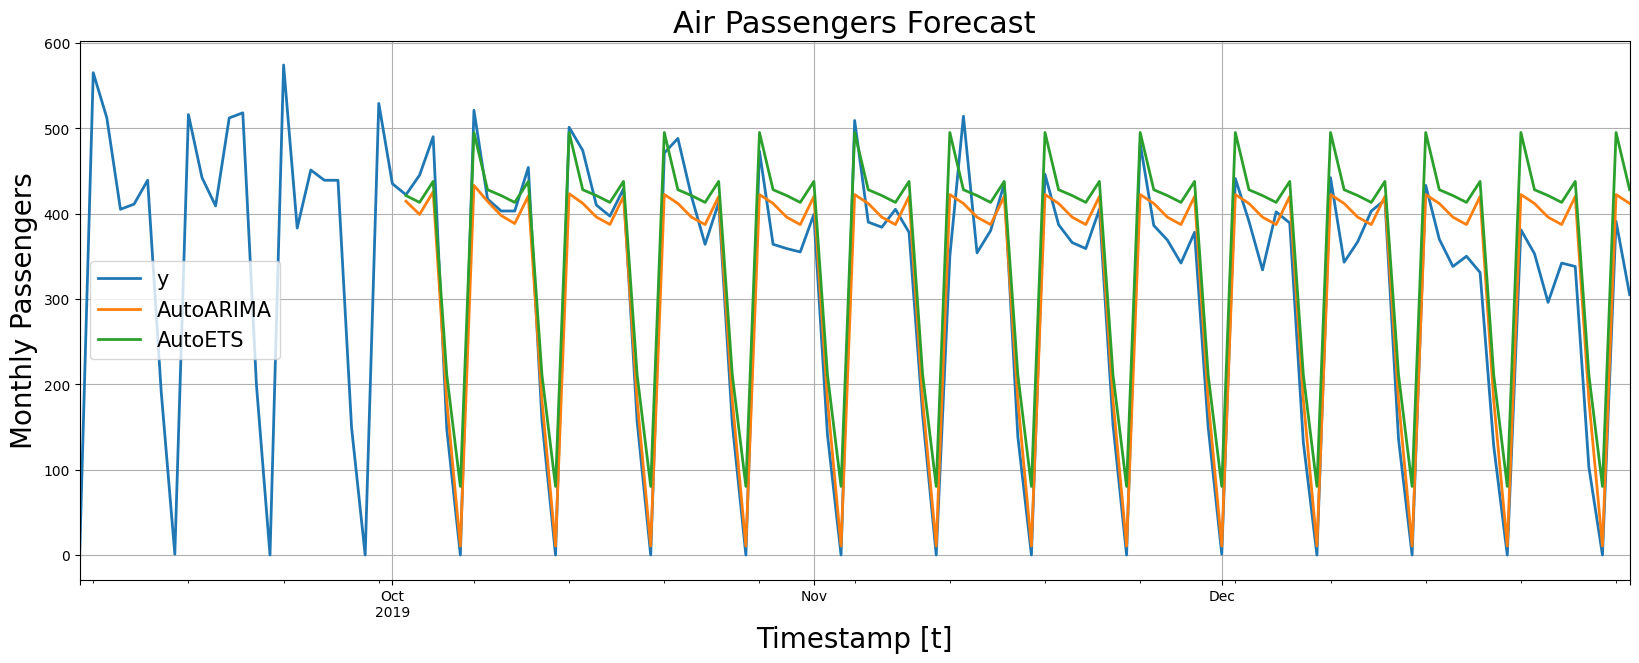

In [64]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))

plot_df[['y', 'AutoARIMA', 'AutoETS']].plot(ax=ax, linewidth=2)

ax.set_title('Air Passengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# Model Evaluation

In [67]:
import numpy as np

In [68]:
def MAE(true, preds):
    return np.mean( np.abs( true - preds ) )

In [69]:
MAE(y_preds['y'], y_preds['AutoARIMA'])

34.7385459627424

In [70]:
MAE(y_preds['y'], y_preds['AutoETS'])

55.92378385774382

In [71]:
MAE(y_preds['y'], y_preds['Naive'])

142.04395604395606

In [72]:
y_preds['ensamble'] = (y_preds['AutoARIMA'] + y_preds['AutoETS']) / 2

In [73]:
MAE(y_preds['y'], y_preds['ensamble'])

42.99738676469405